<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249S22/)</center>


1. Make sure you fill in all cells contain `YOUR CODE HERE` or `YOUR ANSWER HERE`.
2. After you finished, `Restart the kernel & run` all cell in order.
---------


In [1]:
import csc249
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image Gradient

## Gradient with convlution
1. Design a kernel to compute $1^{st}$-order image gradients of x, y directions repectively
2. We use center difference as gradient: $\nabla_iI=I(i+1)-I(i)$
3. Kernel size should be `(1, 2)` for x direction and `(2, 1)` for y direction
4. use `cv2.filter2D` to apply kernel and show filtered 2 images https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=filter2d#filter2d

In [2]:
image = cv2.imread(str(csc249.data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# a. return X,Y filter
def firstorder():
    # YOUR CODE HERE
    X = np.array([[-1,1]])
    Y = np.array([[-1],[1]])
    return X,Y


In [4]:
#b. apply two filters to each channel
# 
X,Y = firstorder()
# print(X)
# print(Y)
image_X = cv2.filter2D(image,ddepth=-1,kernel=X)
image_Y = cv2.filter2D(image,ddepth=-1,kernel=Y)

Text(0.5, 1.0, 'y gradient')

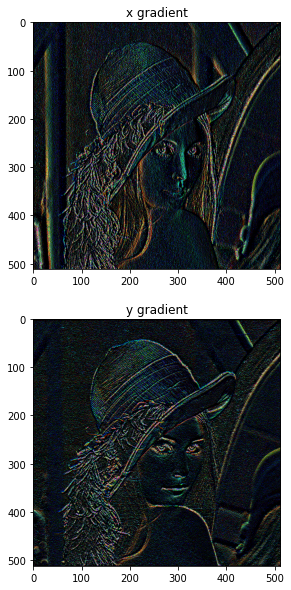

In [5]:
# c. display gradient of each channel of two convimgs with matplotlib (refer to our tutorial)
# - use `cmap='jet'` to show the result
#
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].imshow(image_X*10,cmap='jet')
axs[0].set_title("x gradient")
axs[1].imshow(image_Y*10,cmap='jet')
axs[1].set_title("y gradient")

## High-order gradient
    
The $2^{nd}$-order image gradient is defined as $\nabla^2I=\nabla^2_xI+\nabla^2_yI$

1. Refer class slides for $\nabla^2_xI,\nabla^2_yI$ of a `[3, 3]` kernel
2. Design positive and negetive kernel and use `cv2.filter2D` to apply kernel 
3. Plot the inward and outward edge

In [6]:
image = cv2.imread(str(csc249.data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
# a. design negetive and positive filter
def secondorder_negetive():
    # 
    return np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
def secondorder_positive():
    # 
    return np.array([[0,1,0],[1,-4,1],[0,1,0]])

Text(0.5, 1.0, 'negetive filter')

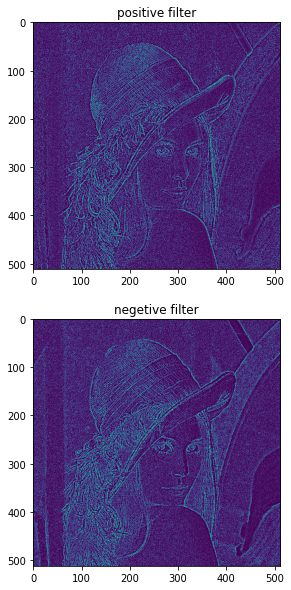

In [8]:
# b. apply filter and display
# 
fig, axs = plt.subplots(2,figsize=(10,10))
neg_filter = secondorder_negetive()
pos_filter = secondorder_positive()
axs[0].imshow(cv2.filter2D(image,ddepth=-1,kernel=neg_filter)*6)
axs[0].set_title("positive filter")
axs[1].imshow(cv2.filter2D(image,ddepth=-1,kernel=pos_filter)*6)
axs[1].set_title("negetive filter")

## Derivative of gaussian
    
Compare $2^{nd}$-order image gradient vs derivative of gaussian.  
In the class, we've introduced the sobel operator as the common approximation for derivative of gaussian

1. Refer class slides for the sobel operator and design filters for X,Y directions repectively
2. Apply the filters and compute the derivative of gaussian defined as
$$G=\sqrt[2]{G_x^2+G_y^2}$$

3. Computer  $2^{nd}$-order image gradient of following noisy image.
4. Plot the $2^{nd}$-order image gradient and derivative of gaussian, compare the result

In [9]:
image = cv2.imread(str(csc249.data/'lena_noise.png'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
# a. design sobal filter
def sobel_x():
    # 
    return np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
def sobel_y():
    # 
    return np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

Text(0.5, 1.0, 'negtive filter')

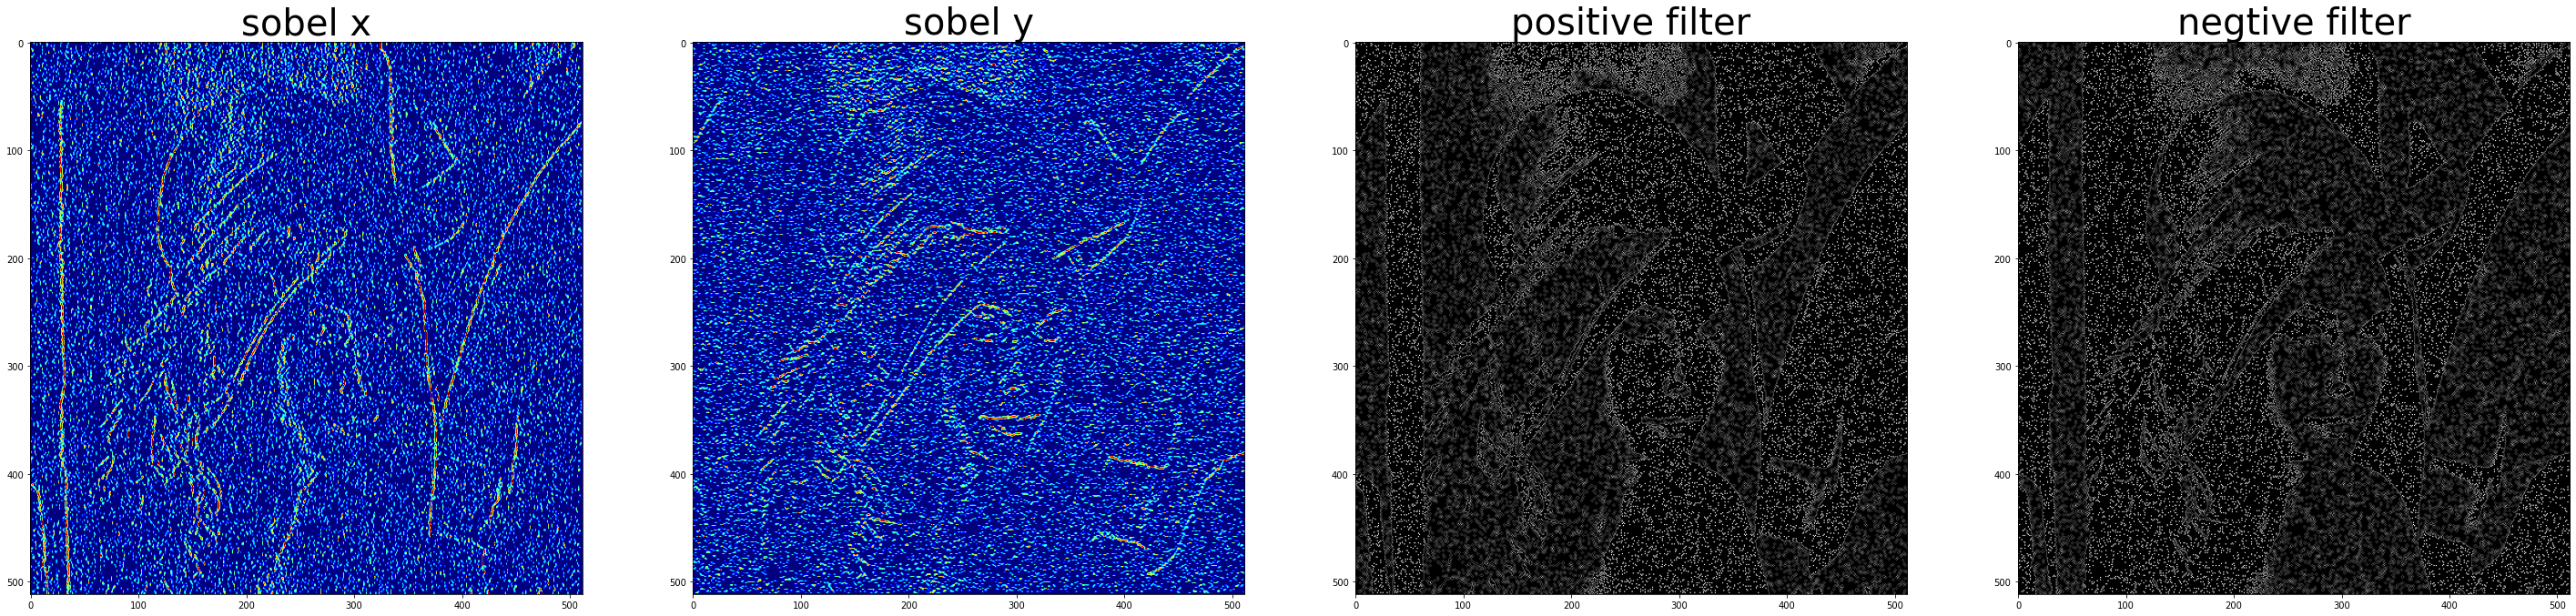

In [11]:
# b. display and compare the derivative of gaussian and $2^{nd}$-order image gradient
# 
fig, axs = plt.subplots(1,4,figsize=(50,50))
sobel_x = sobel_x()
sobel_y = sobel_y()
axs[0].imshow(cv2.filter2D(image,ddepth=-1,kernel=sobel_x)*10,cmap='jet')
axs[0].set_title("sobel x",fontdict = {'fontsize':40})
axs[1].imshow(cv2.filter2D(image,ddepth=-1,kernel=sobel_y)*10,cmap='jet')
axs[1].set_title("sobel y",fontdict = {'fontsize':40})
axs[2].imshow(cv2.filter2D(image,ddepth=-1,kernel=pos_filter)*10,cmap='gray')
axs[2].set_title("positive filter",fontdict = {'fontsize':40})
axs[3].imshow(cv2.filter2D(image,ddepth=-1,kernel=neg_filter)*10,cmap='gray')
axs[3].set_title("negtive filter",fontdict = {'fontsize':40})

# Submission

1. At the menubar, click `Kernel`$\rightarrow$ `Restart & Run All`
2. Download the zip file and upload via blackboard
   
1% deduction of late assignment total score per hour passing the deadline.

In [12]:
# import csc249
# csc249.make_submission()